In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns

In [2]:
df = pd.read_csv("card_transdata.csv")
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [3]:
df.shape

(1000000, 8)

In [4]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [5]:
df.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [6]:
for i in df.columns:
    print(i , ":" , df[i].isnull().sum())

distance_from_home : 0
distance_from_last_transaction : 0
ratio_to_median_purchase_price : 0
repeat_retailer : 0
used_chip : 0
used_pin_number : 0
online_order : 0
fraud : 0


In [7]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [53]:
df.copy().fraud.value_counts(normalize=True)  

0.0    0.912597
1.0    0.087403
Name: fraud, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [9]:
x = df.drop(columns="fraud")
x.head

<bound method NDFrame.head of         distance_from_home  distance_from_last_transaction  \
0                57.877857                        0.311140   
1                10.829943                        0.175592   
2                 5.091079                        0.805153   
3                 2.247564                        5.600044   
4                44.190936                        0.566486   
...                    ...                             ...   
999995            2.207101                        0.112651   
999996           19.872726                        2.683904   
999997            2.914857                        1.472687   
999998            4.258729                        0.242023   
999999           58.108125                        0.318110   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                             1.945940              1.0        1.0   
1                             1.294219              1.0        0.0   
2              

In [13]:
y = df[["fraud"]]
y.head

<bound method NDFrame.head of         fraud
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0

[1000000 rows x 1 columns]>

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state=42)
x_test.shape

(200000, 7)

### Scaling Data

In [17]:
scaler_x = MinMaxScaler()
x_train_scaled = scaler_x.fit_transform(x_train)
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)
x_test_scaled=scaler_x.transform(x_test)

In [18]:
from sklearn.linear_model import LogisticRegression

In [18]:
Y_train_nonscale = pd.DataFrame(y_train)
Y_train_nonscale.values.ravel()

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
type(y_train_scaled)
Y_train = pd.DataFrame(y_train_scaled)
Y_train.values.ravel()

array([0., 0., 0., ..., 0., 0., 0.])

# Using Logistic regression Model

In [23]:
logreg = LogisticRegression(solver="liblinear")
logreg.fit(x_train , Y_train_nonscale.values.ravel())

LogisticRegression(solver='liblinear')

In [241]:
y_pred = logreg.predict(x_test)

In [242]:
y_pred

array([0., 0., 0., ..., 1., 0., 0.])

In [20]:
from sklearn import metrics

In [244]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 

cnf_matrix

array([[181277,   1280],
       [  7003,  10440]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual label')

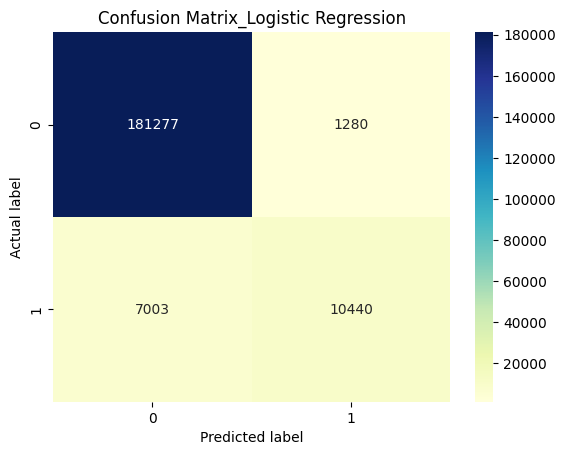

In [245]:
sns.heatmap(pd.DataFrame(cnf_matrix) , annot=True, cmap="YlGnBu" ,fmt='g')
mp.title("Confusion Matrix_Logistic Regression")
mp.xlabel("Predicted label")
mp.ylabel("Actual label")

In [246]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 

print("Precision:",metrics.precision_score(y_test, y_pred)) 

print("Recall:",metrics.recall_score(y_test, y_pred)) 

Accuracy: 0.958585
Precision: 0.8907849829351536
Recall: 0.5985208966347532


###

###### Accuracy using logistic regression : 95.85%

# Using KNN algorithm 

In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train , Y_train_nonscale.values.ravel())

KNeighborsClassifier()

In [248]:
y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0., 0., 0., ..., 1., 0., 0.])

In [249]:
cnf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn) 

cnf_matrix_knn

array([[180489,   2068],
       [  1182,  16261]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Values')

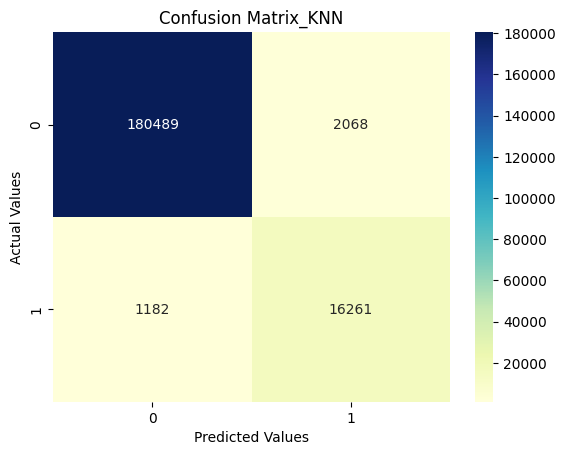

In [250]:
sns.heatmap(pd.DataFrame(cnf_matrix_knn) , annot=True,cmap="YlGnBu" ,fmt='g')
mp.title("Confusion Matrix_KNN")
mp.xlabel("Predicted Values")
mp.ylabel("Actual Values")

In [251]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn)) 

print("Precision:",metrics.precision_score(y_test, y_pred_knn)) 

print("Recall:",metrics.recall_score(y_test, y_pred_knn))

Accuracy: 0.98375
Precision: 0.887173331878444
Recall: 0.9322364272200883


###### Accuracy using knn model : 98.375%

###### SVM cannot be used since the dataset is too large and it becomes an inefficient dataset to be handled by SVM classifiers

### Using RandomForestClassifier

In [252]:
from sklearn.ensemble import RandomForestClassifier
reg = RandomForestClassifier(n_estimators = 30 , random_state = 42)
reg.fit(x_train , Y_train_nonscale.values.ravel())

RandomForestClassifier(n_estimators=30, random_state=42)

In [253]:
y_pred_rf = reg.predict(x_test)
y_pred_rf

array([0., 0., 0., ..., 1., 0., 0.])

In [254]:
cnf_matrix_rdf = metrics.confusion_matrix(y_test , y_pred_rf)
cnf_matrix_rdf

array([[182557,      0],
       [     2,  17441]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual values')

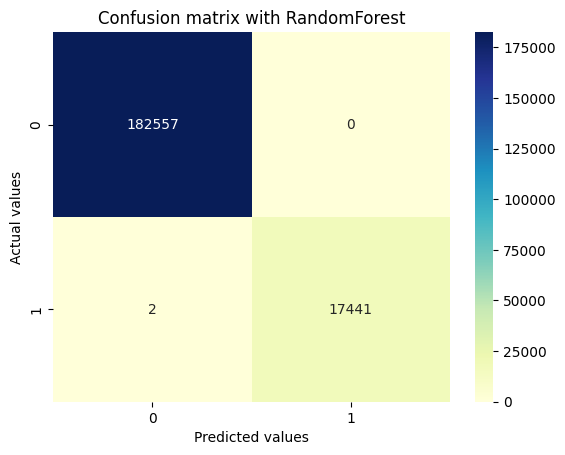

In [255]:
sns.heatmap(pd.DataFrame(cnf_matrix_rdf) , annot=True , cmap="YlGnBu" ,fmt='g')
mp.title("Confusion matrix with RandomForest")
mp.xlabel("Predicted values")
mp.ylabel("Actual values")

In [256]:
print("Accuracy:" , metrics.accuracy_score(y_test , y_pred_rf))
print("Precision:" , metrics.precision_score(y_test , y_pred_rf))
print("Recall:" , metrics.recall_score(y_test , y_pred_rf))

Accuracy: 0.99999
Precision: 1.0
Recall: 0.9998853408243995


##### Accuracy with Randomforest algorithm is 99.99%

### Using AdaBoost Classifier

In [257]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(x_train, Y_train_nonscale.values.ravel())

AdaBoostClassifier()

Default base_estimator is Decision tree Classifier(used)

Default n_estimators = 50 , learning_rate = 1 ( used in the above code )

In [258]:
y_pred_abc = abc.predict(x_test)
y_pred_abc

array([0., 0., 0., ..., 1., 0., 0.])

In [259]:
cnf_matrix_abc = metrics.confusion_matrix(y_test , y_pred_abc)
cnf_matrix_abc

array([[182521,     36],
       [    18,  17425]], dtype=int64)

Text(0.5, 23.52222222222222, 'predict Values')

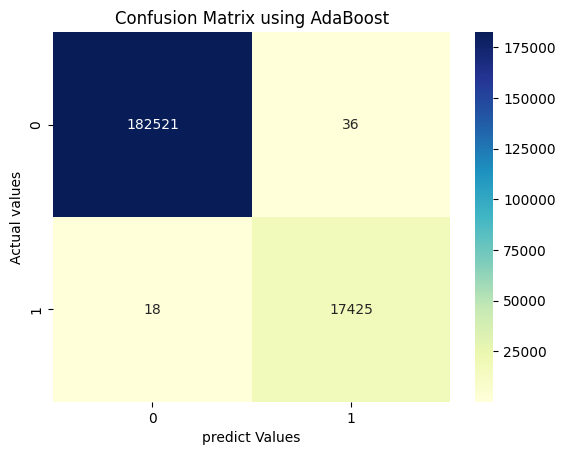

In [260]:
sns.heatmap(pd.DataFrame(cnf_matrix_abc) , annot = True , cmap="YlGnBu" ,fmt='g')
mp.title("Confusion Matrix using AdaBoost")
mp.ylabel("Actual values")
mp.xlabel("predict Values")

In [261]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_abc)) 
print("Precision:", metrics.precision_score(y_test , y_pred_abc))
print("Recall:" , metrics.recall_score(y_test , y_pred_abc))

Accuracy: 0.99973
Precision: 0.9979382624133784
Recall: 0.9989680674195952


##### Accuracy using AdaBoost Classifier : 99.97%

### Using XGBoost Classifier

In [262]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective="binary:logistic" , n_estimators = 30 , seed = 123)
xg_cl.fit(x_train , Y_train_nonscale.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=30, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, ...)

In [263]:
y_pred_xgb = xg_cl.predict(x_test)
y_pred_xgb

array([0, 0, 0, ..., 1, 0, 0])

In [264]:
cnf_matrix_xgb = metrics.confusion_matrix(y_test , y_pred_xgb)
cnf_matrix_xgb

array([[182556,      1],
       [     3,  17440]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Values')

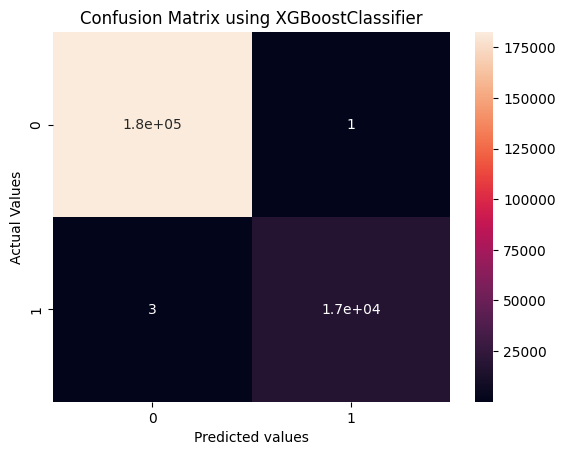

In [265]:
sns.heatmap(pd.DataFrame(cnf_matrix_xgb) , annot=True)
mp.title("Confusion Matrix using XGBoostClassifier")
mp.xlabel("Predicted values")
mp.ylabel("Actual Values")


In [266]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb)) 
print("Precision:", metrics.precision_score(y_test , y_pred_xgb))
print("Recall:" , metrics.recall_score(y_test , y_pred_xgb))

Accuracy: 0.99998
Precision: 0.9999426638380827
Recall: 0.9998280112365993


##### Accuracy using XGBBoost Classifier : 99.998%

### Using DecisionTreeClassifier

In [267]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 3)
dtc.fit(x_train , Y_train_nonscale.values.ravel())

DecisionTreeClassifier(max_depth=3)

In [268]:
y_pred_dtc = dtc.predict(x_test)
y_pred_dtc

array([0., 0., 0., ..., 1., 0., 0.])

In [269]:
cnf_matrix_dtc = metrics.confusion_matrix(y_test , y_pred_dtc)
cnf_matrix_dtc

array([[180076,   2481],
       [  1646,  15797]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Values')

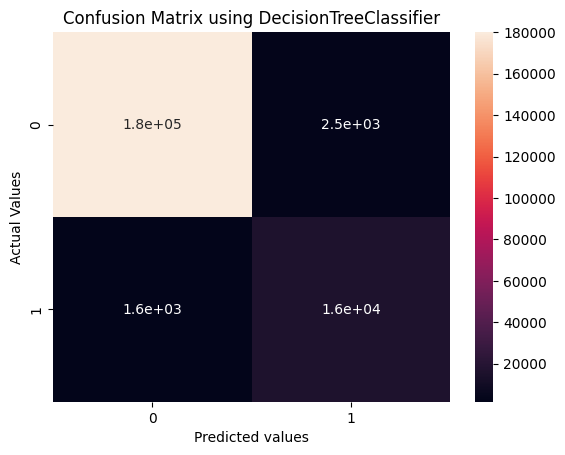

In [270]:
sns.heatmap(pd.DataFrame(cnf_matrix_dtc) , annot=True)
mp.title("Confusion Matrix using DecisionTreeClassifier")
mp.xlabel("Predicted values")
mp.ylabel("Actual Values")


In [271]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc)) 
print("Precision:", metrics.precision_score(y_test , y_pred_dtc))
print("Recall:" , metrics.recall_score(y_test , y_pred_dtc))

Accuracy: 0.979365
Precision: 0.8642630484735748
Recall: 0.905635498480766


### Using NaiveBayes algorithm

In [272]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train , Y_train_nonscale.values.ravel())



GaussianNB()

In [273]:
y_pred_nb = model.predict(x_test)
y_pred_nb

array([0., 0., 0., ..., 1., 0., 0.])

In [274]:
cnf_matrix_nb = metrics.confusion_matrix(y_test , y_pred_nb)
cnf_matrix_nb

array([[179744,   2813],
       [  6963,  10480]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Values')

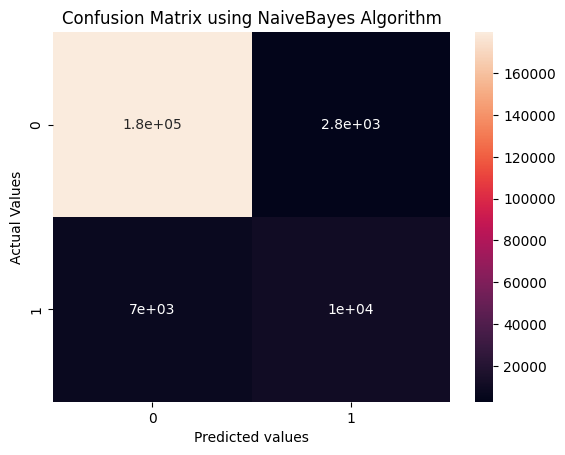

In [275]:
sns.heatmap(pd.DataFrame(cnf_matrix_nb) , annot=True)
mp.title("Confusion Matrix using NaiveBayes Algorithm")
mp.xlabel("Predicted values")
mp.ylabel("Actual Values")


In [276]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_nb)) 
print("Precision:", metrics.precision_score(y_test , y_pred_nb))
print("Recall:" , metrics.recall_score(y_test , y_pred_nb))

Accuracy: 0.95112
Precision: 0.7883848642142481
Recall: 0.6008140801467637


### Importing TensorFlow and Keras

In [19]:
import tensorflow as tf
import keras

In [20]:
x_train_scaled.shape

(800000, 7)

In [21]:
df2 = df.copy()

In [22]:
df2.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [23]:
fraud = df2.loc[df2["fraud"]==1.0]
n_fraud = df2.loc[df2["fraud"]==0.0]
n_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [24]:
x_fraud = n_fraud.drop(columns="fraud")
x_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [26]:
x_fraud_train , x_fraud_test = train_test_split(x_fraud , test_size=0.25 , random_state=42)
x_fraud_test.shape
indexes = x_fraud_train.index
y_fraud_train = df2["fraud"].loc[indexes]
indexes_2 = x_fraud_test.index
y_fraud_test = df2["fraud"].loc[indexes_2]
x_fraud_train.shape

(684447, 7)

In [27]:
df2.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [31]:
features = df2.drop(columns="fraud" , axis=1)
target = df2["fraud"]
x_train_2 , x_test_2 , y_train_2 , y_test_2 = train_test_split(features , target , test_size=0.2 , random_state = 42 )
train_index = y_train_2[y_train_2==1].index
train_data = x_train_2.loc[train_index]
mms = MinMaxScaler(feature_range=(0, 1))
x_train_2_scaled = mms.fit_transform(train_data.copy())
x_test_2_scaled = mms.transform(x_test_2.copy())

### Using AutoEncoder

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [36]:
scaler_xfraud = MinMaxScaler(feature_range=(0,1))
x_fraud_train_scaled = scaler_xfraud.fit_transform(x_fraud_train.copy())
x_fraud_test_scaled = scaler_xfraud.transform(x_fraud_test.copy())
x_fraud_train_scaled

array([[2.26333928e-03, 2.18755057e-04, 4.07074333e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [4.82441981e-03, 2.75007825e-04, 1.07028519e-02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.59467110e-02, 1.48446783e-04, 1.89786635e-03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.19391339e-03, 3.70157632e-04, 4.03290857e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.01338291e-03, 2.49340673e-05, 3.62742933e-03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.30905426e-03, 1.44089277e-04, 1.21515984e-02, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [34]:
class AutoEncoder(Model):
    
    def __init__(self , op_units , cd_size=8):
        super().__init__()
        self.encoder = Sequential([
            Dense(64 , activation="relu"),
            Dropout(0.1),
            Dense(32 , activation="relu") , 
            Dropout(0.1),
            Dense(16 , activation="relu"),
            Dropout(0.1),
            Dense(8 , activation="relu")
        ])
        self.decoder = Sequential([
            Dense(16 , activation="relu"),
            Dropout(0.1),
            Dense(32 , activation="relu"),
            Dropout(0.1),
            Dense(64 , activation="relu"), 
            Dropout(0.1),
            Dense(op_units , activation="sigmoid")
        ])
        
        
    def call(self , ip):
        encoded = self.encoder(ip)
        decoded = self.decoder(encoded)
        return decoded

### Encoder 1

In [36]:
mau = AutoEncoder(op_units = x_train_2_scaled.shape[1])
mau.compile(loss = "BinaryCrossentropy" , metrics = ["accuracy"] , optimizer = "adam")

hist = mau.fit(
               x_train_2_scaled , 
               x_train_2_scaled , 
               epochs = 500 , 
               batch_size = int(x_train_2_scaled.shape[0]/6),
               validation_data = (x_test_2_scaled , x_test_2_scaled)
)

Epoch 1/500
6/6 [==============================] - 3s 208ms/step - loss: 0.6832 - accuracy: 0.1434 - val_loss: 0.6675 - val_accuracy: 0.0442
Epoch 2/500
6/6 [==============================] - 1s 99ms/step - loss: 0.6437 - accuracy: 0.2483 - val_loss: 0.6236 - val_accuracy: 0.0442
Epoch 3/500
6/6 [==============================] - 1s 94ms/step - loss: 0.5786 - accuracy: 0.2311 - val_loss: 0.5526 - val_accuracy: 0.0442
Epoch 4/500
6/6 [==============================] - 1s 98ms/step - loss: 0.4797 - accuracy: 0.2033 - val_loss: 0.4573 - val_accuracy: 0.0442
Epoch 5/500
6/6 [==============================] - 1s 98ms/step - loss: 0.3617 - accuracy: 0.1790 - val_loss: 0.3736 - val_accuracy: 0.0442
Epoch 6/500
6/6 [==============================] - 1s 96ms/step - loss: 0.2676 - accuracy: 0.1567 - val_loss: 0.3667 - val_accuracy: 0.0442
Epoch 7/500
6/6 [==============================] - 1s 98ms/step - loss: 0.2337 - accuracy: 0.1461 - val_loss: 0.4172 - val_accuracy: 0.0442
Epoch 8/500
6/6 [==

Epoch 117/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0417 - accuracy: 0.2411 - val_loss: 0.0856 - val_accuracy: 0.4461
Epoch 118/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0415 - accuracy: 0.2347 - val_loss: 0.0854 - val_accuracy: 0.4461
Epoch 119/500
6/6 [==============================] - 1s 102ms/step - loss: 0.0417 - accuracy: 0.2348 - val_loss: 0.0855 - val_accuracy: 0.4461
Epoch 120/500
6/6 [==============================] - 1s 104ms/step - loss: 0.0413 - accuracy: 0.2307 - val_loss: 0.0852 - val_accuracy: 0.4461
Epoch 121/500
6/6 [==============================] - 1s 98ms/step - loss: 0.0414 - accuracy: 0.2314 - val_loss: 0.0849 - val_accuracy: 0.4461
Epoch 122/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0412 - accuracy: 0.2264 - val_loss: 0.0846 - val_accuracy: 0.4461
Epoch 123/500
6/6 [==============================] - 1s 93ms/step - loss: 0.0411 - accuracy: 0.2209 - val_loss: 0.0845 - val_accuracy: 0.4461
Epoc

Epoch 232/500
6/6 [==============================] - 1s 93ms/step - loss: 0.0358 - accuracy: 0.1280 - val_loss: 0.0809 - val_accuracy: 0.4081
Epoch 233/500
6/6 [==============================] - 1s 93ms/step - loss: 0.0358 - accuracy: 0.1282 - val_loss: 0.0809 - val_accuracy: 0.4081
Epoch 234/500
6/6 [==============================] - 1s 91ms/step - loss: 0.0355 - accuracy: 0.1271 - val_loss: 0.0809 - val_accuracy: 0.4081
Epoch 235/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0357 - accuracy: 0.1278 - val_loss: 0.0810 - val_accuracy: 0.4081
Epoch 236/500
6/6 [==============================] - 1s 91ms/step - loss: 0.0358 - accuracy: 0.1285 - val_loss: 0.0814 - val_accuracy: 0.4081
Epoch 237/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0354 - accuracy: 0.1289 - val_loss: 0.0826 - val_accuracy: 0.4081
Epoch 238/500
6/6 [==============================] - 1s 96ms/step - loss: 0.0357 - accuracy: 0.1284 - val_loss: 0.0822 - val_accuracy: 0.4081
Epoch 

6/6 [==============================] - 1s 91ms/step - loss: 0.0340 - accuracy: 0.1192 - val_loss: 0.0852 - val_accuracy: 0.3883
Epoch 347/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0341 - accuracy: 0.1192 - val_loss: 0.0846 - val_accuracy: 0.3895
Epoch 348/500
6/6 [==============================] - 1s 91ms/step - loss: 0.0336 - accuracy: 0.1189 - val_loss: 0.0845 - val_accuracy: 0.3883
Epoch 349/500
6/6 [==============================] - 0s 86ms/step - loss: 0.0338 - accuracy: 0.1184 - val_loss: 0.0849 - val_accuracy: 0.3897
Epoch 350/500
6/6 [==============================] - 1s 92ms/step - loss: 0.0338 - accuracy: 0.1193 - val_loss: 0.0849 - val_accuracy: 0.3897
Epoch 351/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0339 - accuracy: 0.1172 - val_loss: 0.0847 - val_accuracy: 0.3897
Epoch 352/500
6/6 [==============================] - 1s 99ms/step - loss: 0.0338 - accuracy: 0.1183 - val_loss: 0.0851 - val_accuracy: 0.3897
Epoch 353/500
6/6 [=

Epoch 404/500
6/6 [==============================] - 1s 96ms/step - loss: 0.0335 - accuracy: 0.1168 - val_loss: 0.0884 - val_accuracy: 0.4081
Epoch 405/500
6/6 [==============================] - 1s 95ms/step - loss: 0.0335 - accuracy: 0.1166 - val_loss: 0.0880 - val_accuracy: 0.4081
Epoch 406/500
6/6 [==============================] - 1s 93ms/step - loss: 0.0333 - accuracy: 0.1157 - val_loss: 0.0888 - val_accuracy: 0.4081
Epoch 407/500
6/6 [==============================] - 0s 90ms/step - loss: 0.0335 - accuracy: 0.1173 - val_loss: 0.0890 - val_accuracy: 0.4081
Epoch 408/500
6/6 [==============================] - 1s 96ms/step - loss: 0.0334 - accuracy: 0.1175 - val_loss: 0.0893 - val_accuracy: 0.4081
Epoch 409/500
6/6 [==============================] - 1s 93ms/step - loss: 0.0335 - accuracy: 0.1173 - val_loss: 0.0891 - val_accuracy: 0.4081
Epoch 410/500
6/6 [==============================] - 1s 94ms/step - loss: 0.0334 - accuracy: 0.1171 - val_loss: 0.0895 - val_accuracy: 0.4081
Epoch 

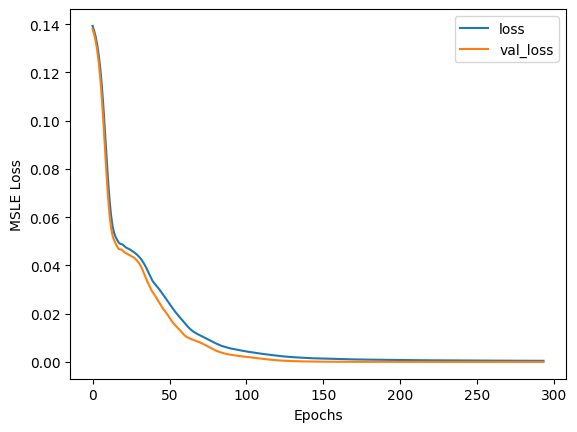

In [39]:
mp.plot(hist.history['loss'])
mp.plot(hist.history['val_loss'])
mp.xlabel('Epochs')
mp.ylabel('MSLE Loss')
mp.legend(['loss', 'val_loss'])
mp.show()

### Encoder 2

In [288]:
mau_new = AutoEncoder(op_units = x_fraud_train_scaled.shape[1])
mau_new.compile(loss = "msle" , metrics = ["msle"] , optimizer = "adam")

hist = mau_new.fit(
               x_fraud_train_scaled , 
               x_fraud_train_scaled , 
               epochs = 200 , 
               batch_size = int(x_fraud_train.shape[0]/3),
               validation_data = (x_fraud_test_scaled , x_fraud_test_scaled)
)

Epoch 1/200
3/3 [==============================] - 4s 768ms/step - loss: 0.1401 - msle: 0.1401 - val_loss: 0.1392 - val_msle: 0.1392
Epoch 2/200
3/3 [==============================] - 2s 562ms/step - loss: 0.1388 - msle: 0.1388 - val_loss: 0.1379 - val_msle: 0.1379
Epoch 3/200
3/3 [==============================] - 2s 595ms/step - loss: 0.1374 - msle: 0.1374 - val_loss: 0.1362 - val_msle: 0.1362
Epoch 4/200
3/3 [==============================] - 2s 570ms/step - loss: 0.1356 - msle: 0.1356 - val_loss: 0.1342 - val_msle: 0.1342
Epoch 5/200
3/3 [==============================] - 2s 554ms/step - loss: 0.1332 - msle: 0.1332 - val_loss: 0.1315 - val_msle: 0.1315
Epoch 6/200
3/3 [==============================] - 2s 559ms/step - loss: 0.1303 - msle: 0.1303 - val_loss: 0.1280 - val_msle: 0.1280
Epoch 7/200
3/3 [==============================] - 2s 552ms/step - loss: 0.1264 - msle: 0.1264 - val_loss: 0.1236 - val_msle: 0.1236
Epoch 8/200
3/3 [==============================] - 2s 525ms/step - lo

3/3 [==============================] - 1s 485ms/step - loss: 0.0042 - msle: 0.0042 - val_loss: 0.0021 - val_msle: 0.0021
Epoch 124/200
3/3 [==============================] - 2s 495ms/step - loss: 0.0041 - msle: 0.0041 - val_loss: 0.0020 - val_msle: 0.0020
Epoch 125/200
3/3 [==============================] - 1s 492ms/step - loss: 0.0040 - msle: 0.0040 - val_loss: 0.0020 - val_msle: 0.0020
Epoch 126/200
3/3 [==============================] - 1s 484ms/step - loss: 0.0039 - msle: 0.0039 - val_loss: 0.0019 - val_msle: 0.0019
Epoch 127/200
3/3 [==============================] - 1s 483ms/step - loss: 0.0039 - msle: 0.0039 - val_loss: 0.0019 - val_msle: 0.0019
Epoch 128/200
3/3 [==============================] - 1s 491ms/step - loss: 0.0038 - msle: 0.0038 - val_loss: 0.0019 - val_msle: 0.0019
Epoch 129/200
3/3 [==============================] - 1s 484ms/step - loss: 0.0038 - msle: 0.0038 - val_loss: 0.0018 - val_msle: 0.0018
Epoch 130/200
3/3 [==============================] - 1s 494ms/step - 

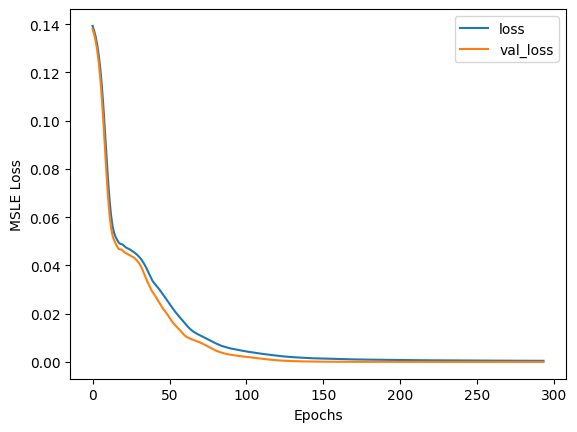

In [40]:
mp.plot(hist.history['loss'])
mp.plot(hist.history['val_loss'])
mp.xlabel('Epochs')
mp.ylabel('MSLE Loss')
mp.legend(['loss', 'val_loss'])
mp.show()

In [88]:
from tensorflow.keras.callbacks import EarlyStopping
mau_new3 = AutoEncoder(op_units = x_fraud_train_scaled.shape[1])
mau_new3.compile(loss = "msle" , metrics = ["msle"] , optimizer = "adam")

custom_es = EarlyStopping(
                          monitor = "val_loss",
                          patience = 10,
                          )
hist_4 = mau_new3.fit(
               x_fraud_train_scaled , 
               x_fraud_train_scaled , 
               epochs = 500 , 
               batch_size = int(x_fraud_train.shape[0]/2),
               validation_data = (x_fraud_test_scaled , x_fraud_test_scaled),
               callbacks=[custom_es]
)

Epoch 1/500
3/3 [==============================] - 4s 781ms/step - loss: 0.1398 - msle: 0.1398 - val_loss: 0.1385 - val_msle: 0.1385
Epoch 2/500
3/3 [==============================] - 2s 542ms/step - loss: 0.1381 - msle: 0.1381 - val_loss: 0.1368 - val_msle: 0.1368
Epoch 3/500
3/3 [==============================] - 2s 469ms/step - loss: 0.1361 - msle: 0.1361 - val_loss: 0.1345 - val_msle: 0.1345
Epoch 4/500
3/3 [==============================] - 2s 423ms/step - loss: 0.1338 - msle: 0.1338 - val_loss: 0.1318 - val_msle: 0.1318
Epoch 5/500
3/3 [==============================] - 2s 424ms/step - loss: 0.1308 - msle: 0.1308 - val_loss: 0.1283 - val_msle: 0.1283
Epoch 6/500
3/3 [==============================] - 2s 448ms/step - loss: 0.1270 - msle: 0.1270 - val_loss: 0.1240 - val_msle: 0.1240
Epoch 7/500
3/3 [==============================] - 2s 441ms/step - loss: 0.1224 - msle: 0.1224 - val_loss: 0.1186 - val_msle: 0.1186
Epoch 8/500
3/3 [==============================] - 2s 444ms/step - lo

3/3 [==============================] - 2s 435ms/step - loss: 0.0154 - msle: 0.0154 - val_loss: 0.0122 - val_msle: 0.0122
Epoch 124/500
3/3 [==============================] - 2s 474ms/step - loss: 0.0153 - msle: 0.0153 - val_loss: 0.0120 - val_msle: 0.0120


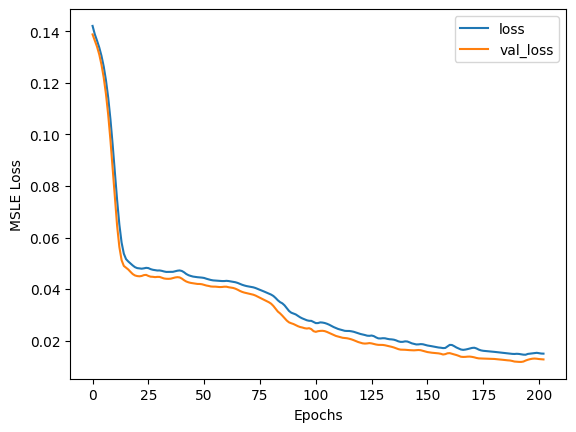

In [45]:
mp.plot(hist_4.history['loss'])
mp.plot(hist_4.history['val_loss'])
mp.xlabel('Epochs')
mp.ylabel('MSLE Loss')
mp.legend(['loss', 'val_loss'])
mp.show()

### Encoder 3

In [37]:
from tensorflow.keras.callbacks import EarlyStopping
mau_new2 = AutoEncoder(op_units = x_fraud_train_scaled.shape[1])
mau_new2.compile(loss = "msle" , metrics = ["msle"] , optimizer = "adam")

custom_es = EarlyStopping(
                          monitor = "val_loss",
                          patience = 2,
                          )
hist_3 = mau_new2.fit(
               x_fraud_train_scaled , 
               x_fraud_train_scaled , 
               epochs = 500 , 
               batch_size = int(x_fraud_train.shape[0]/3),
               validation_data = (x_fraud_test_scaled , x_fraud_test_scaled),
               callbacks=[custom_es]
)

Epoch 1/500
3/3 [==============================] - 4s 956ms/step - loss: 0.1378 - msle: 0.1378 - val_loss: 0.1361 - val_msle: 0.1361
Epoch 2/500
3/3 [==============================] - 2s 567ms/step - loss: 0.1343 - msle: 0.1343 - val_loss: 0.1318 - val_msle: 0.1318
Epoch 3/500
3/3 [==============================] - 2s 547ms/step - loss: 0.1294 - msle: 0.1294 - val_loss: 0.1259 - val_msle: 0.1259
Epoch 4/500
3/3 [==============================] - 2s 497ms/step - loss: 0.1229 - msle: 0.1229 - val_loss: 0.1182 - val_msle: 0.1182
Epoch 5/500
3/3 [==============================] - 2s 522ms/step - loss: 0.1146 - msle: 0.1146 - val_loss: 0.1085 - val_msle: 0.1085
Epoch 6/500
3/3 [==============================] - 2s 512ms/step - loss: 0.1048 - msle: 0.1048 - val_loss: 0.0975 - val_msle: 0.0975
Epoch 7/500
3/3 [==============================] - 2s 520ms/step - loss: 0.0939 - msle: 0.0939 - val_loss: 0.0858 - val_msle: 0.0858
Epoch 8/500
3/3 [==============================] - 2s 533ms/step - lo

3/3 [==============================] - 1s 519ms/step - loss: 0.0035 - msle: 0.0035 - val_loss: 0.0011 - val_msle: 0.0011
Epoch 124/500
3/3 [==============================] - 2s 545ms/step - loss: 0.0034 - msle: 0.0034 - val_loss: 0.0011 - val_msle: 0.0011
Epoch 125/500
3/3 [==============================] - 1s 514ms/step - loss: 0.0033 - msle: 0.0033 - val_loss: 9.5776e-04 - val_msle: 9.5776e-04
Epoch 126/500
3/3 [==============================] - 1s 508ms/step - loss: 0.0032 - msle: 0.0032 - val_loss: 8.7884e-04 - val_msle: 8.7884e-04
Epoch 127/500
3/3 [==============================] - 1s 509ms/step - loss: 0.0031 - msle: 0.0031 - val_loss: 8.2416e-04 - val_msle: 8.2416e-04
Epoch 128/500
3/3 [==============================] - 2s 517ms/step - loss: 0.0030 - msle: 0.0030 - val_loss: 7.6557e-04 - val_msle: 7.6557e-04
Epoch 129/500
3/3 [==============================] - 2s 502ms/step - loss: 0.0029 - msle: 0.0029 - val_loss: 7.0559e-04 - val_msle: 7.0559e-04
Epoch 130/500
3/3 [==========

3/3 [==============================] - 2s 525ms/step - loss: 8.0686e-04 - msle: 8.0686e-04 - val_loss: 5.5237e-05 - val_msle: 5.5237e-05
Epoch 236/500
3/3 [==============================] - 1s 510ms/step - loss: 7.9321e-04 - msle: 7.9321e-04 - val_loss: 5.4722e-05 - val_msle: 5.4722e-05
Epoch 237/500
3/3 [==============================] - 2s 561ms/step - loss: 7.9257e-04 - msle: 7.9257e-04 - val_loss: 5.4421e-05 - val_msle: 5.4421e-05
Epoch 238/500
3/3 [==============================] - 2s 543ms/step - loss: 7.8465e-04 - msle: 7.8465e-04 - val_loss: 5.4239e-05 - val_msle: 5.4239e-05
Epoch 239/500
3/3 [==============================] - 2s 538ms/step - loss: 7.8216e-04 - msle: 7.8216e-04 - val_loss: 5.3970e-05 - val_msle: 5.3970e-05
Epoch 240/500
3/3 [==============================] - 2s 519ms/step - loss: 7.7719e-04 - msle: 7.7719e-04 - val_loss: 5.3490e-05 - val_msle: 5.3490e-05
Epoch 241/500
3/3 [==============================] - 2s 522ms/step - loss: 7.6130e-04 - msle: 7.6130e-04 - v

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

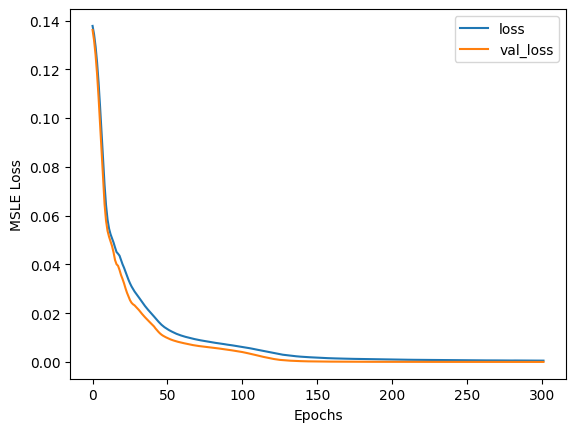

In [38]:
mp.plot(hist_3.history['loss'])
mp.plot(hist_3.history['val_loss'])
mp.xlabel('Epochs')
mp.ylabel('MSLE Loss')
mp.legend(['loss', 'val_loss'])
mp.show()

### Encoder 5

In [37]:
mau_new5 = AutoEncoder(op_units = x_train_2_scaled.shape[1])
mau_new5.compile(loss = "mse",  metrics = ["accuracy"] , optimizer = "adam")

custom_es_3 = EarlyStopping(
                          monitor = "loss",
                          patience = 5,
                          )
hist_5 = mau_new5.fit(
               x_train_2_scaled , 
               x_train_2_scaled , 
               epochs = 500 , 
               batch_size = int(10000),
               validation_data = (x_test_2_scaled , x_test_2_scaled),
               callbacks = [custom_es_3]
)

Epoch 1/500
7/7 [==============================] - 1s 86ms/step - loss: 0.2411 - accuracy: 0.3982 - val_loss: 0.2411 - val_accuracy: 0.5535
Epoch 2/500
7/7 [==============================] - 0s 59ms/step - loss: 0.2295 - accuracy: 0.7636 - val_loss: 0.2263 - val_accuracy: 0.8706
Epoch 3/500
7/7 [==============================] - 0s 57ms/step - loss: 0.2052 - accuracy: 0.8383 - val_loss: 0.1966 - val_accuracy: 0.8816
Epoch 4/500
7/7 [==============================] - 0s 56ms/step - loss: 0.1606 - accuracy: 0.8508 - val_loss: 0.1486 - val_accuracy: 0.8816
Epoch 5/500
7/7 [==============================] - 0s 56ms/step - loss: 0.1009 - accuracy: 0.8435 - val_loss: 0.1057 - val_accuracy: 0.8816
Epoch 6/500
7/7 [==============================] - 0s 55ms/step - loss: 0.0619 - accuracy: 0.8061 - val_loss: 0.1029 - val_accuracy: 0.8816
Epoch 7/500
7/7 [==============================] - 0s 56ms/step - loss: 0.0521 - accuracy: 0.6866 - val_loss: 0.1034 - val_accuracy: 0.7540
Epoch 8/500
7/7 [===

7/7 [==============================] - 0s 55ms/step - loss: 0.0013 - accuracy: 0.9473 - val_loss: 0.0151 - val_accuracy: 0.9530
Epoch 118/500
7/7 [==============================] - 0s 58ms/step - loss: 0.0013 - accuracy: 0.9469 - val_loss: 0.0151 - val_accuracy: 0.9404
Epoch 119/500
7/7 [==============================] - 0s 54ms/step - loss: 0.0013 - accuracy: 0.9470 - val_loss: 0.0150 - val_accuracy: 0.9404
Epoch 120/500
7/7 [==============================] - 0s 57ms/step - loss: 0.0013 - accuracy: 0.9482 - val_loss: 0.0150 - val_accuracy: 0.9546
Epoch 121/500
7/7 [==============================] - 0s 54ms/step - loss: 0.0013 - accuracy: 0.9509 - val_loss: 0.0150 - val_accuracy: 0.9664
Epoch 122/500
7/7 [==============================] - 0s 54ms/step - loss: 0.0013 - accuracy: 0.9505 - val_loss: 0.0150 - val_accuracy: 0.9664
Epoch 123/500
7/7 [==============================] - 0s 59ms/step - loss: 0.0012 - accuracy: 0.9510 - val_loss: 0.0149 - val_accuracy: 0.9664
Epoch 124/500
7/7 [=

### Encoder 6/(tuning results)

In [22]:
df3 = pd.read_csv("card_transdata.csv")
df3.head()

train_x, test_x = train_test_split(df3, test_size=0.3, random_state=42)
train_x = train_x[train_x["fraud"] == 1] #where normal transactions
train_x = train_x.drop(['fraud'], axis=1) #drop the class column
test_y = test_x['fraud'] #save the class column for the test set
test_x = test_x.drop(['fraud'], axis=1) #drop the class column
train_x = train_x.values #transform to ndarray
test_x = test_x.values
train_x.shape, test_x.shape

((61274, 7), (300000, 7))

In [60]:
early_custom = EarlyStopping(patience = 2 , monitor="loss")


model = Sequential()
model.add(Dense(24 , input_dim = train_x.shape[1] , activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(18 , activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(8 , activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(18 , activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(24 , activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(train_x.shape[1] , activation="sigmoid"))
model.compile(loss="msle" , optimizer="adam" , metrics="accuracy" )
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 24)                192       
                                                                 
 dropout_10 (Dropout)        (None, 24)                0         
                                                                 
 dense_13 (Dense)            (None, 18)                450       
                                                                 
 dropout_11 (Dropout)        (None, 18)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 152       
                                                                 
 dropout_12 (Dropout)        (None, 8)                 0         
                                                                 
 dense_15 (Dense)            (None, 18)               

In [61]:
model.fit(train_x , train_x , verbose = 1 , epochs = 6000 ,  callbacks=[early_custom] , batch_size = int(train_x.shape[0]/5))

Epoch 1/6000
6/6 [==============================] - 1s 29ms/step - loss: 2.0620 - accuracy: 0.2032
Epoch 2/6000
6/6 [==============================] - 0s 26ms/step - loss: 2.0287 - accuracy: 0.3457
Epoch 3/6000
6/6 [==============================] - 0s 26ms/step - loss: 1.9883 - accuracy: 0.4559
Epoch 4/6000
6/6 [==============================] - 0s 26ms/step - loss: 1.9368 - accuracy: 0.5509
Epoch 5/6000
6/6 [==============================] - 0s 26ms/step - loss: 1.8778 - accuracy: 0.5814
Epoch 6/6000
6/6 [==============================] - 0s 26ms/step - loss: 1.8203 - accuracy: 0.5720
Epoch 7/6000
6/6 [==============================] - 0s 26ms/step - loss: 1.7749 - accuracy: 0.5642
Epoch 8/6000
6/6 [==============================] - 0s 26ms/step - loss: 1.7426 - accuracy: 0.5427
Epoch 9/6000
6/6 [==============================] - 0s 27ms/step - loss: 1.7188 - accuracy: 0.5227
Epoch 10/6000
6/6 [==============================] - 0s 22ms/step - loss: 1.7014 - accuracy: 0.4919
Epoch 11/

In [62]:
predictions = model.predict(test_x)

9375/9375 [==============================] - 16s 2ms/step


In [65]:
import tensorflow as tf
errors = tf.keras.losses.mae(predictions, test_x)
  # 1 = anomaly, 0 = normal
anomaly_mask = pd.Series(errors) > 3
preds = anomaly_mask.map(lambda x: 1.0 if x == True else 0.0)

In [66]:
cnf_matrix_auto = metrics.confusion_matrix(test_y , preds) 
cnf_matrix_auto

array([[174417,  99454],
       [  9969,  16160]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Values')

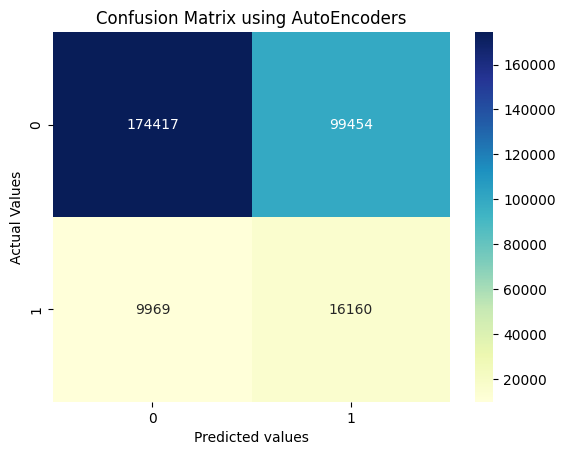

In [67]:
sns.heatmap(pd.DataFrame(cnf_matrix_auto) , annot=True , cmap="YlGnBu" ,fmt='g')
mp.title("Confusion Matrix using AutoEncoders")
mp.xlabel("Predicted values")
mp.ylabel("Actual Values")


In [68]:
print("Accuracy:",metrics.accuracy_score(test_y , preds))
print("Precision:",metrics.precision_score(test_y , prl;k p;,./ opdeds))
print("Recall:",metrics.recall_score(test_y , preds))

Accuracy: 0.6352566666666667
Precision: 0.13977545971941113
Recall: 0.6184698993455547


### Using IsolationForest Algorithm

In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
isf = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.5),random_state=42)
isf.fit(df[["fraud"]])

C:\Users\KIIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.5, random_state=42)

In [23]:
df['isf_scores'] = isf.decision_function(df[['fraud']])

df['anomaly_score'] = isf.predict(df[['fraud']])

df[df['anomaly_score']==-1]

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud,isf_scores,anomaly_score
13,2.131956,56.372401,6.358667,1.0,0.0,0.0,1.0,1.0,-0.179703,-1
24,3.803057,67.241081,1.872950,1.0,0.0,0.0,1.0,1.0,-0.179703,-1
29,15.694986,175.989182,0.855623,1.0,0.0,0.0,1.0,1.0,-0.179703,-1
35,26.711462,1.552008,4.603601,1.0,1.0,0.0,1.0,1.0,-0.179703,-1
36,10.664474,1.565769,4.886521,1.0,0.0,0.0,1.0,1.0,-0.179703,-1
...,...,...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1.0,0.0,0.0,1.0,1.0,-0.179703,-1
999916,167.139756,0.282253,0.308468,1.0,0.0,0.0,1.0,1.0,-0.179703,-1
999919,124.640118,0.004416,0.434885,1.0,0.0,0.0,1.0,1.0,-0.179703,-1
999939,51.412900,3.429330,29.914254,1.0,0.0,0.0,1.0,1.0,-0.179703,-1


In [24]:
anomaly_counter = len(df[df['fraud']!=0])
anomaly_counter

87403

In [25]:
isf_accuracy = 100*list(df['anomaly_score']).count(-1)/(anomaly_counter)
print("Accuracy of the model:", isf_accuracy)

Accuracy of the model: 100.0


In [21]:
y_pred_isf = isf.predict(x_test)
y_pred_isf

array([ 1,  1,  1, ...,  1,  1, -1])

In [22]:
y_pred_isft = np.where(y_pred_isf>0 , 0 , 1)
y_pred_isft

array([0, 0, 0, ..., 0, 0, 1])

In [23]:
cnf_isf = metrics.confusion_matrix(y_test , y_pred_isft)
cnf_isf

array([[166947,  15610],
       [ 13119,   4324]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual label')

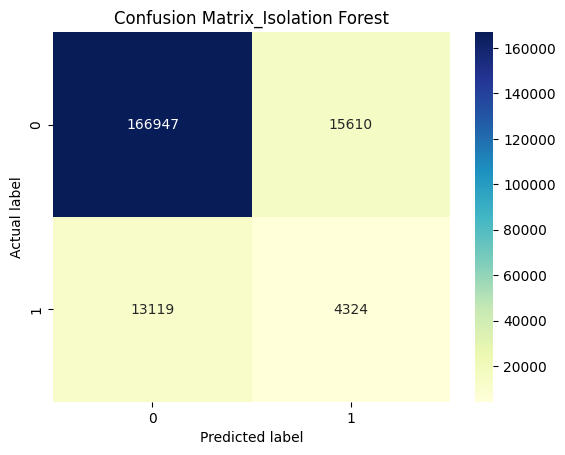

In [24]:
sns.heatmap(pd.DataFrame(cnf_isf) , annot=True, cmap="YlGnBu" ,fmt='g')
mp.title("Confusion Matrix_Isolation Forest")

mp.xlabel("Predicted label")
mp.ylabel("Actual label")

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test , y_pred_isft))
print("Precision:",metrics.precision_score(y_test , y_pred_isft))
print("Recall:",metrics.recall_score(y_test , y_pred_isft))

Accuracy: 0.856355
Precision: 0.2169158222133039
Recall: 0.2478931376483403


### Using KNN (pyOD)

In [22]:
from pyod.models.knn import KNN

In [63]:
clf_k = KNN(contamination = 0.087403 , n_neighbors = 7 , n_jobs = 2)
clf_k.fit(x_train)

KNN(algorithm='auto', contamination=0.087403, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=2, n_neighbors=7, p=2,
  radius=1.0)

In [64]:
y_train_pred = clf_k.labels_

In [65]:
y_train_scores = clf_k.decision_scores_

In [57]:
from pyod.utils.data import evaluate_print

In [66]:
evaluate_print('KNN', y_train, y_train_scores) 

KNN ROC:0.8163, precision @ rank n:0.3275


In [67]:
y_test_scores = clf_k.decision_function(x_test)  

In [68]:
evaluate_print('KNN', y_test,y_test_scores)

KNN ROC:0.8145, precision @ rank n:0.3208
